# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# 1. Data Inspection

In [2]:
df=pd.read_csv('/content/kz.csv')

In [3]:
df.shape

(22899, 8)

In [4]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [5]:
df.tail()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
22894,2020-06-11 10:28:06 UTC,2329107617009369632,1515966223509089803,2.268105e+18,electronics.smartphone,oppo,115.49,1.515916e+18
22895,2020-06-11 10:35:29 UTC,2329111338564977521,1515966223510433289,2.268105e+18,furniture.kitchen.chair,staub,199.05,1.515916e+18
22896,2020-06-11 10:36:48 UTC,2329111996600943545,1515966223509089034,2.268105e+18,appliances.kitchen.washer,lg,324.05,1.515916e+18
22897,2020-06-11 10:37:19 UTC,2329112263375455189,2273948242779570644,2.268105e+18,electronics.smartphone,sony,138.63,1.515916e+18
22898,2020-06-11 10:38:04 UTC,2329112638212015097,2273948218704266105,2.268105e+18,appliances.kitchen.refrigerators,indesit,351.83,1.515916e+16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22899 entries, 0 to 22898
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     22899 non-null  object 
 1   order_id       22899 non-null  int64  
 2   product_id     22899 non-null  int64  
 3   category_id    22875 non-null  float64
 4   category_code  18262 non-null  object 
 5   brand          21996 non-null  object 
 6   price          22875 non-null  float64
 7   user_id        22875 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.4+ MB


In [7]:
print("Total records (rows) in the dataset : {}".format(df.shape[0]))
print("Total columns (features) in the dataset : {}".format(df.shape[1]))

Total records (rows) in the dataset : 22899
Total columns (features) in the dataset : 8


#  Numeric Columns and Non-Numeric Columns

In [8]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['order_id' 'product_id' 'category_id' 'price' 'user_id']
The non-numeric columns are : ['event_time' 'category_code' 'brand']


In [9]:
df.describe()

,order_id,product_id,category_id,price,user_id
count,2.289900e+04,2.289900e+04,2.287500e+04,22875.000000,2.287500e+04
mean,2.312424e+18,1.663429e+18,2.273760e+18,172.911430,1.515850e+18
std,8.371061e+15,3.005758e+17,2.223386e+16,274.050208,9.922696e+15
min,2.294360e+18,1.515966e+18,2.268105e+18,0.000000,1.515916e+16
25%,2.305388e+18,1.515966e+18,2.268105e+18,20.810000,1.515916e+18
50%,2.313079e+18,1.515966e+18,2.268105e+18,69.420000,1.515916e+18
75%,2.317744e+18,1.515966e+18,2.268105e+18,208.310000,1.515916e+18
max,2.329113e+18,2.327614e+18,2.374499e+18,9606.480000,1.515916e+18


# 2. Handling Missing Data

In [10]:
missing=df.isna()

In [11]:
missing

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
22894,False,False,False,False,False,False,False,False
22895,False,False,False,False,False,False,False,False
22896,False,False,False,False,False,False,False,False
22897,False,False,False,False,False,False,False,False


In [12]:
missing.sum()

event_time          0
order_id            0
product_id          0
category_id        24
category_code    4637
brand             903
price              24
user_id            24
dtype: int64

In [13]:
# Calculate the Percentage of Missing Values:
missing_percentage = (df.isnull().sum() / len(df)) * 100

In [14]:
missing_percentage

event_time        0.000000
order_id          0.000000
product_id        0.000000
category_id       0.104808
category_code    20.249793
brand             3.943404
price             0.104808
user_id           0.104808
dtype: float64

In [15]:
# Identify Rows or Columns with High Missing Values:

In [16]:
# Define a threshold (e.g., 20%)
threshold = 20

# Identify columns with a high percentage of missing values
high_missing_columns = missing_percentage[missing_percentage > threshold].index.tolist()


In [17]:
# Remove Rows or Columns:
df = df.drop(columns=high_missing_columns)

In [18]:
df=df.dropna()

In [19]:
df

,event_time,order_id,product_id,category_id,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,karcher,217.57,1.515916e+18
...,...,...,...,...,...,...,...
22894,2020-06-11 10:28:06 UTC,2329107617009369632,1515966223509089803,2.268105e+18,oppo,115.49,1.515916e+18
22895,2020-06-11 10:35:29 UTC,2329111338564977521,1515966223510433289,2.268105e+18,staub,199.05,1.515916e+18
22896,2020-06-11 10:36:48 UTC,2329111996600943545,1515966223509089034,2.268105e+18,lg,324.05,1.515916e+18
22897,2020-06-11 10:37:19 UTC,2329112263375455189,2273948242779570644,2.268105e+18,sony,138.63,1.515916e+18


# Impute Missing Values:

In [20]:
from sklearn.impute import SimpleImputer

# Create an imputer for numerical data (e.g., mean imputation)
numerical_imputer = SimpleImputer(strategy='mean')
df['price'] = numerical_imputer.fit_transform(df[['price']])



In [21]:
# Create an imputer for categorical data (e.g., mode imputation)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df['category_id'] = categorical_imputer.fit_transform(df[['category_id']])

In [22]:
df

,event_time,order_id,product_id,category_id,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,karcher,217.57,1.515916e+18
...,...,...,...,...,...,...,...
22894,2020-06-11 10:28:06 UTC,2329107617009369632,1515966223509089803,2.268105e+18,oppo,115.49,1.515916e+18
22895,2020-06-11 10:35:29 UTC,2329111338564977521,1515966223510433289,2.268105e+18,staub,199.05,1.515916e+18
22896,2020-06-11 10:36:48 UTC,2329111996600943545,1515966223509089034,2.268105e+18,lg,324.05,1.515916e+18
22897,2020-06-11 10:37:19 UTC,2329112263375455189,2273948242779570644,2.268105e+18,sony,138.63,1.515916e+18


In [23]:
missing=df.isna()

In [24]:
missing.sum()

event_time     0
order_id       0
product_id     0
category_id    0
brand          0
price          0
user_id        0
dtype: int64

In [25]:
df.dtypes

event_time      object
order_id         int64
product_id       int64
category_id    float64
brand           object
price          float64
user_id        float64
dtype: object


# 3. Inconsistent Data Formats

In [26]:
df

,event_time,order_id,product_id,category_id,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,karcher,217.57,1.515916e+18
...,...,...,...,...,...,...,...
22894,2020-06-11 10:28:06 UTC,2329107617009369632,1515966223509089803,2.268105e+18,oppo,115.49,1.515916e+18
22895,2020-06-11 10:35:29 UTC,2329111338564977521,1515966223510433289,2.268105e+18,staub,199.05,1.515916e+18
22896,2020-06-11 10:36:48 UTC,2329111996600943545,1515966223509089034,2.268105e+18,lg,324.05,1.515916e+18
22897,2020-06-11 10:37:19 UTC,2329112263375455189,2273948242779570644,2.268105e+18,sony,138.63,1.515916e+18


In [27]:
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

# 4. Creating a new feature brand_loyalty

In [28]:
df['brand_loyalty'] = df.groupby('order_id')['brand'].transform(lambda x: int(len(x.unique()) == 1))

# 5. Inconsistency check

In [29]:
# checking inconsistency in brand

In [30]:
df['brand'].value_counts()

samsung      4073
ava          1278
apple        1110
xiaomi        691
huawei        654
             ... 
pedigree        1
belcando        1
inspector       1
bardahl         1
staub           1
Name: brand, Length: 479, dtype: int64

In [31]:
top_n = 10
top_brands = df['brand'].value_counts().head(top_n)
print(top_brands)

samsung    4073
ava        1278
apple      1110
xiaomi      691
huawei      654
polaris     641
lg          538
philips     524
beko        473
tefal       439
Name: brand, dtype: int64


In [32]:
threshold = 100  # Brands with fewer than 100 occurrences will be grouped as 'Other'
brand_counts = df['brand'].value_counts()
df['brand'] = df['brand'].apply(lambda x: x if brand_counts[x] >= threshold else 'Other')
print(df['brand'].value_counts())

Other        5200
samsung      4073
ava          1278
apple        1110
xiaomi        691
huawei        654
polaris       641
lg            538
philips       524
beko          473
tefal         439
sony          389
bosch         355
ggg           319
asus          300
vitek         257
hp            254
honor         254
lenovo        240
oppo          236
bloody        223
braun         209
hyperx        206
logitech      200
panasonic     194
neo           194
canon         187
scarlett      177
jbl           172
delux         163
tp-link       159
genius        158
ariston       149
trust         142
none          141
redmond       137
transcend     135
hansa         127
midea         126
akvafor       125
kingston      108
rowenta       107
maxwell       107
vivo          101
Name: brand, dtype: int64


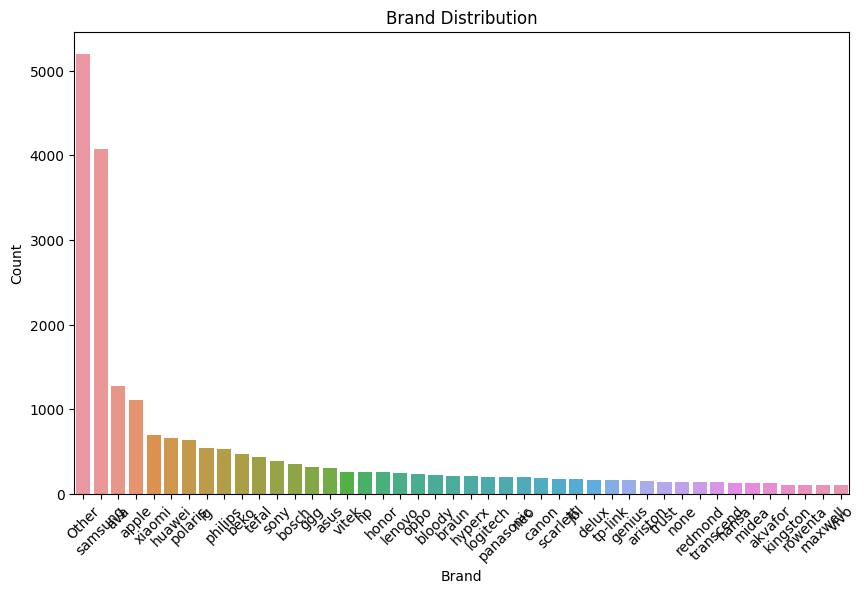

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Create a count plot using Seaborn
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index, ax=ax)

# Set the title for the plot
ax.set_title('Brand Distribution')

# Set axis labels
ax.set_xlabel('Brand')
ax.set_ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [34]:
df['brand'].value_counts()

Other        5200
samsung      4073
ava          1278
apple        1110
xiaomi        691
huawei        654
polaris       641
lg            538
philips       524
beko          473
tefal         439
sony          389
bosch         355
ggg           319
asus          300
vitek         257
hp            254
honor         254
lenovo        240
oppo          236
bloody        223
braun         209
hyperx        206
logitech      200
panasonic     194
neo           194
canon         187
scarlett      177
jbl           172
delux         163
tp-link       159
genius        158
ariston       149
trust         142
none          141
redmond       137
transcend     135
hansa         127
midea         126
akvafor       125
kingston      108
rowenta       107
maxwell       107
vivo          101
Name: brand, dtype: int64

# 6. Duplicate check

In [35]:
dup = df.drop_duplicates()

print("Number of records after removing duplicates : {}".format(dup.shape[0]))
print("Number of records in original dataset : {}".format(df.shape[0]))

Number of records after removing duplicates : 21860
Number of records in original dataset : 21972


# Exporting the Cleaned Data Set to csv

In [36]:
df.to_csv('Transaction_Cleaned_Data.csv', index=False)